# 7o Lab de PSD (notebook para preencher com os resultados)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Número do Grupo : Grupo 2
-Felipe Lopes Duarte
-Pedro Klesse
-Vitor Caligaris Figueira

In [ ]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt


# **1.0 - Definição do filtro de Gabor 2D (domínio espacial)**

O filtro de Gabor é um filtro do tipo passa-banda que possui alguns parâmetros que permitem que ele possa ser ajustado para realçar informações com diferentes escalas e orientações em uma imagem. A sua forma geral é dada pela equação abaixo.

$$\begin{aligned}
G(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp \left( -\frac{x'^2 + \gamma^2 y'^2}{2\sigma^2} \right) \cos\left( 2\pi \frac{x'}{\lambda} + \psi \right)
\end{aligned}$$

$$\begin{aligned}
x'&= x\cos\theta + y\sin\theta\\
y'&=-x\sin\theta + y\cos\theta\\
\end{aligned}$$

$\lambda$ = comprimento de onda do fator senoidal

$\theta$ = ângulo de orientação do filtro

$\gamma$ = controla a razão de aspecto do filtro

$\psi$ = fase da função senoidal

## **1.1 - Implementação do filtro de Gabor 2D**

Na implementação do filtro de Gabor 2D, utilizar uma máscara de tamanho $M \times N$, em que M=64 e N=64. Após a implementação do filtro, verifique se o filtro se encontra na forma normalizada, ou seja, que o máximo valor de coeficiente é igual a 1.0

In [ ]:
# Implementar a função Gabor 2D

def gabor(lamda, theta, psi, sigma, gamma, M, N):
  nx = np.linspace(-(M/2), M/2, M)
  ny = np.linspace(-(N/2), N/2, N)
  x_ = nx*np.cos(theta) + ny*np.sin(theta)
  y_ = -nx*np.sin(theta) + ny*np.cos(theta)

  xv, yv = np.meshgrid(x_,y_)


  gab_filter = np.exp(- (xv ** 2 + (gamma ** 2)* yv ** 2 )/ 2* (sigma ** 2)) * np.cos(2*np.pi* (xv/lamda) + psi)

  return gab_filter

## 1.2 - Plotar, como imagem, os filtros de Gabor (par e ímpar) a partir do filtro implementado acima

(<matplotlib.axes._subplots.AxesSubplot at 0x7feb7659a550>,
 Text(0.5, 1.0, 'Filtro de Gabor par'))

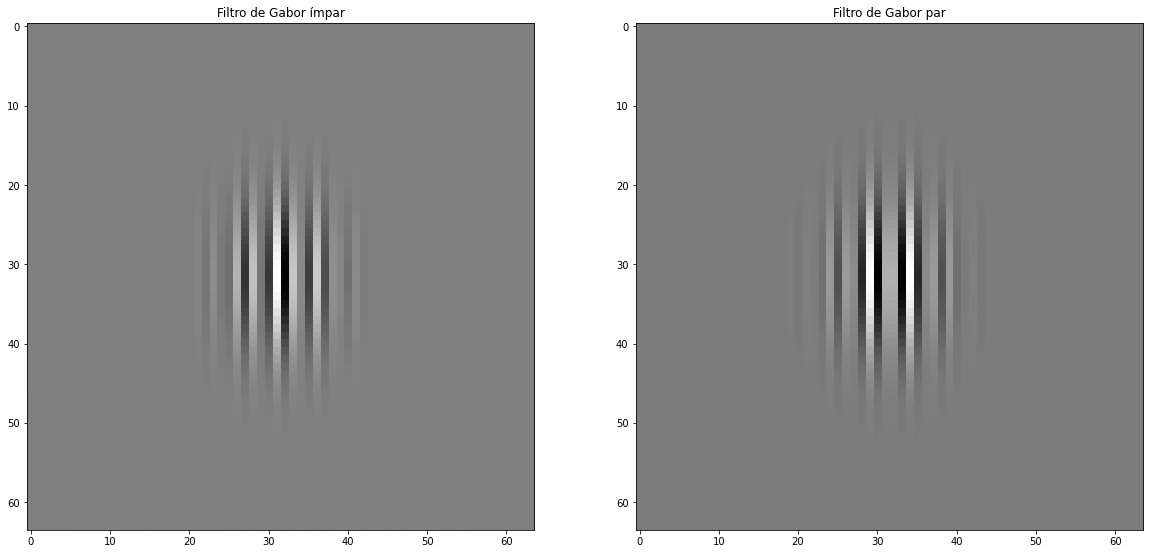

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121), plt.imshow(gabor(0.5,0.2,np.pi/2,0.2,1,64,64),cmap='gray'), plt.title('Filtro de Gabor ímpar')
plt.subplot(122), plt.imshow(gabor(0.5,0.2,0,0.2,1,64,64),cmap='gray'), plt.title('Filtro de Gabor par')


## 1.3 - Testes com diferentes filtros

Usando a imagem fornecida, faça a convolução da imagem com o filtro para os seguintes conjuntos de parâmetros:

a) Fixe $\gamma = \sigma = 1.0$, $\lambda = 0.2$ e $\psi=0$. Então, varie $\theta = 0^{°}, 45^{°}$ e $90^{°}$

b) Fixe $\gamma = 1.5$, $\sigma = 2.0$, $\lambda = 0.2$ e $\psi=0$. Então, varie $\theta = 0^{°}, 45^{°}$ e $90^{°}$

c) Para os dois conjuntos de parâmetros acima, modifique apenas o valor de $\psi$ para $\psi = \frac{\pi}{2}$ - Rode os experimentos novamente.

Para cada um dos itens acima, plote os filtros gerados e faça a convolução de cada um deles com a imagem fornecida para essa prática.


## 1.3 - Filtros de Gabor usando OpenCV

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
#
# Parâmetros do filro
#
ksize = 40
sigma = 2
theta = 0 #1*np.pi / 2
labda = 1*np.pi / 4
gamma = 1.0
phi = np.pi/2

#
# Usar a função getGaborKernel do OpenCV para criar um filtro Gabor com os parâmetros especificados acima
#

filtro1 = cv2.getGaborKernel((ksize, ksize), sigma, theta, labda, gamma, phi)

(<matplotlib.image.AxesImage at 0x7feb78713d10>,
 Text(0.5, 1.0, 'Filtro de Gabor'))

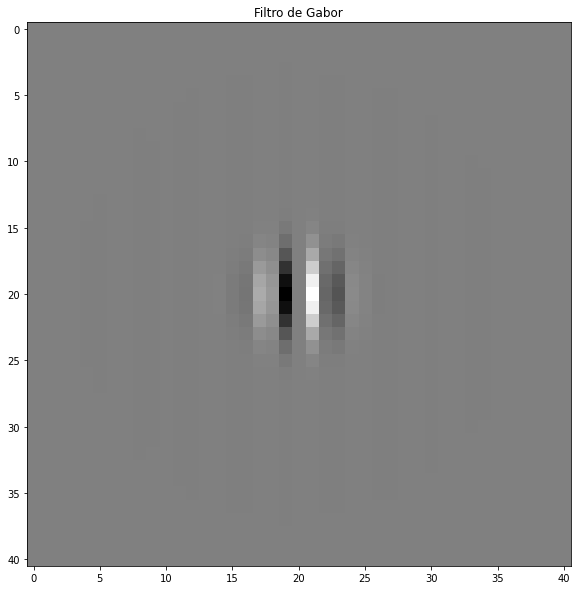

In [ ]:
#
# Plotar o filtro gerador usando a função imshow do pyplot
#
plt.figure(figsize=[20,10])
plt.imshow(filtro1,cmap='gray'), plt.title('Filtro de Gabor')


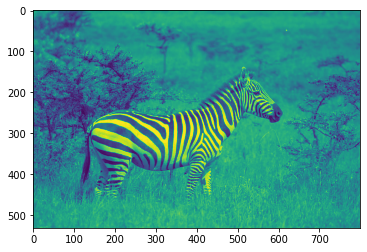

In [ ]:
path = "/content/"
filename = "Zebra.jpg"
imageRGB= cv2.imread(path + filename)
imageGRAY = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY)

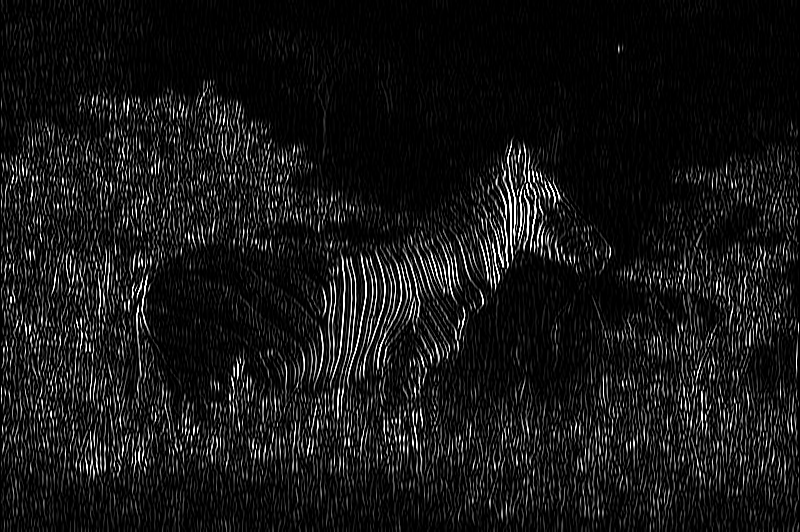

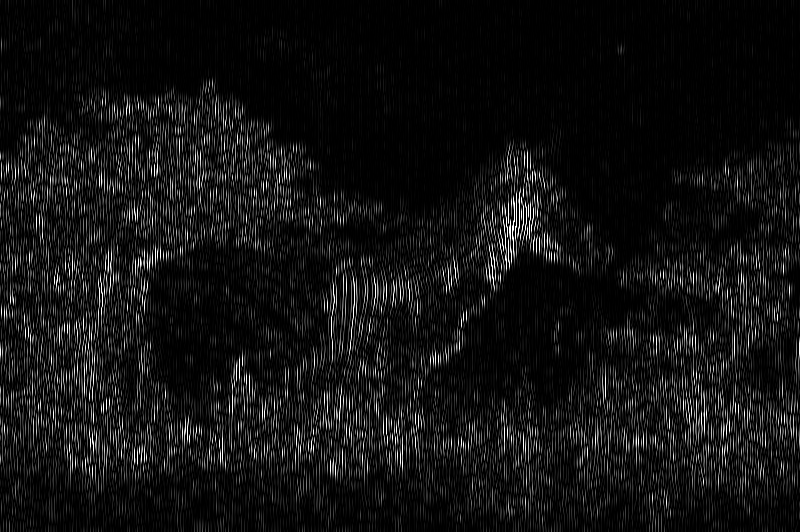

In [ ]:
#
# Utilizando a função filter2D do OpenCV, faça a convolução da imagem com o filtro Gabor
#
# OBS: modifique os parâmetros e verifique o que acontece com o resultado da filtragem
#


img_filtered1 = cv2.filter2D(imageGRAY,-1, filtro1)
img_filtered2 = cv2.filter2D(imageGRAY,-1, gabor(0.5,0.2,np.pi/2,0.4,1,64,64))

cv2_imshow(img_filtered1)
cv2_imshow(img_filtered2)
cv2.waitKey()
cv2.destroyAllWindows()


# **2.0 - Definição do filtro de Gabor 2D (domínio da frequência)**

Selecione um dos filtros gerados acima e, utilizando a fft, gere o filtro no domínio da frequência. Realize a filtragem da imagem  no domínio da frequência e retorne para o domínio da imagem usando a função ifft.

Pense sobre como proceder com a tarefa solicitada acima.

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


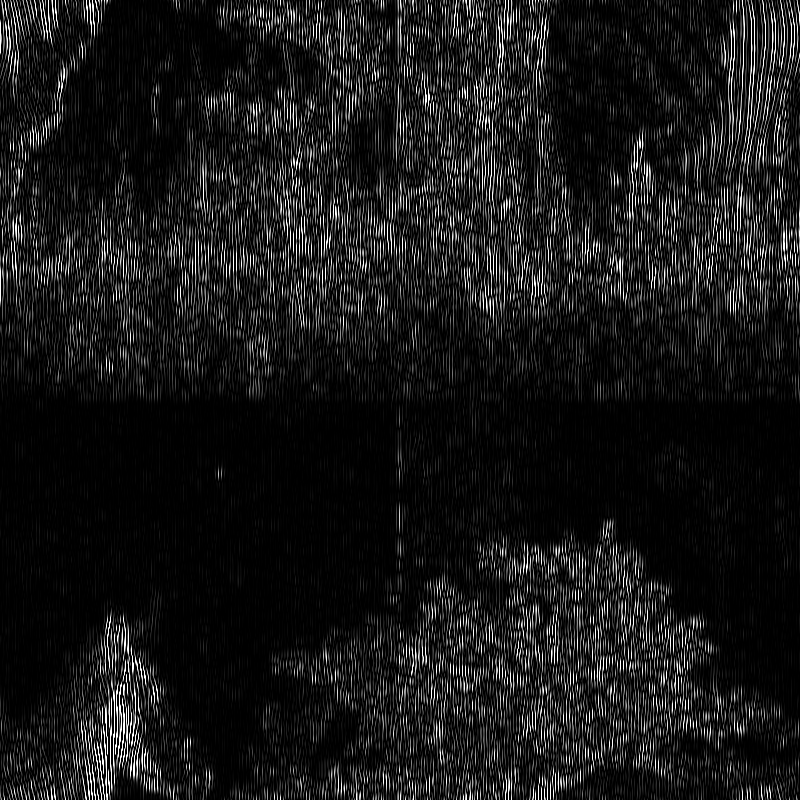

In [ ]:
img_padded = cv2.resize(imageGRAY, (800,800), interpolation = cv2.INTER_AREA)

img_fft = np.fft.fft2(img_padded)

filter_fft = np.fft.fft2(gabor(0.5,0.2,np.pi/2,0.4,1,800,800))

img_filtered = filter_fft * img_fft
img_filtered = np.fft.ifft2(img_filtered)

cv2_imshow(img_filtered)


